#Single Actor Seek and Patch

In this notebook, we look at the rate of discovery for a single actor who immediately patches any vulnerabilities he encounters. We see that the rate of discovery declines as bugs get patched, and the total (but to the vendor, unknown) number of vulnerabilities decays in an exponential-like fashion.

In [5]:
%pylab inline
import circlesquare
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [6]:
model = circlesquare.CircleSquare()
model.make_points(10000)

seeker = model.new_interface('Seeker')
seeker.make_circles(max_area=.01)

(0, 0.0314)

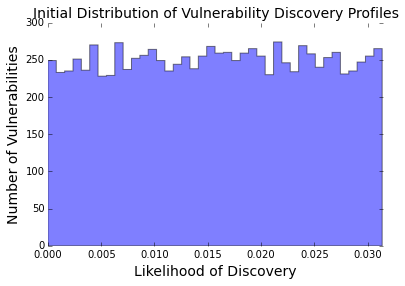

In [7]:
plt.hist(seeker.circles.area, bins=40, histtype='stepfilled', alpha=.5);
plt.title('Initial Distribution of Vulnerability Discovery Profiles', fontsize=14)
plt.xlabel('Likelihood of Discovery', fontsize=14)
plt.ylabel('Number of Vulnerabilities', fontsize=14)
plt.box('off')
plt.xlim(0, .0314)

In [8]:
round_counts = []
for i in range(500):
    round_counts.append({'round':model.rounds_hardened, 
                         'total':model.count_pts()})
    seeker.harden(1)    

#### Format the resulting output

In [5]:
df = pd.DataFrame(round_counts)
df.set_index('round', inplace=True)
df['this round'] = df.diff()
df['smoothed'] = pd.stats.moments.rolling_mean(df['this round'],5)
df.head()

,total,this round,smoothed
round,,,
0,10000,NaN,NaN
1,9861,-139,NaN
2,9744,-117,NaN
3,9598,-146,NaN
4,9468,-130,NaN


#### Plot the resulting output

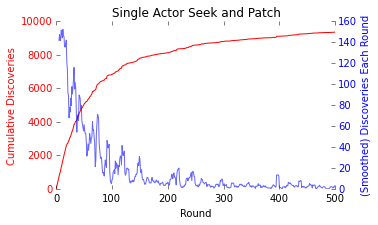

In [10]:
df = df.iloc[:1000] #truncate to the first 1000 rounds, if we ran more in the sim

fig, ax1 = plt.subplots(figsize=(5,3))

ax1.plot(df.index, df['total'].iloc[0]-df['total'], 'r-')
ax1.set_xlabel('Round')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Cumulative Discoveries', color='r')
for tl in ax1.get_yticklabels():
    tl.set_color('r')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2 = ax1.twinx()
ax2.plot(df.index, -1*df['smoothed'], 'b-', alpha=.6)

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('(Smoothed) Discoveries Each Round', color='b')
for tl in ax2.get_yticklabels():
    tl.set_color('b')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.title('Single Actor Seek and Patch')
plt.savefig('images/hardening/Seek_and_patch_timeseries.png', bbox_inches='tight')

# lets do this 100 times:

In [ ]:
fig, ax1 = plt.subplots(figsize=(3,3)) 

for i in range(100):
    model = circlesquare.circlesquare()
    model.make_circles()

    round_counts = []
    for _ in range(500):
        round_counts.append({'round':model.rounds_hardened, 
                             'total':model.count_circles()})
        model.harden(1)   

        df = pd.DataFrame(round_counts)
        df.set_index('round', inplace=True)
    
    ax1.plot(df.index, df['total'], 'r-', alpha=.05)
    
    
ax1.set_xlabel('Round')
ax1.set_ylabel('Remaining Vulnerabilities')
plt.title('Software Hardening Process');
plt.savefig('images/hardening/Seek_and_patch_monte_carlo.png', bbox_inches='tight')

In [ ]:
fig, ax1 = plt.subplots(figsize=(3,3)) 

for i in range(100):
    model = circlesquare.circlesquare()
    model.make_circles()

    round_counts = []
    for _ in range(100):
        round_counts.append({'round':model.rounds_hardened, 
                             'total':model.count_circles()})
        model.harden(1)   

        df = pd.DataFrame(round_counts)
        df.set_index('round', inplace=True)
        df['this round'] = df.diff()
    
    ax1.plot(df.index, -1*df['this round'], 'b-', alpha=.05)
    
    
ax1.set_xlabel('Round')
ax1.set_ylabel('Discoveries per Round')
plt.title('Software Hardening Process');
plt.savefig('images/hardening/Seek_and_patch_per_round_monte_carlo.png', bbox_inches='tight')

# histogram

(0, 0.0314)

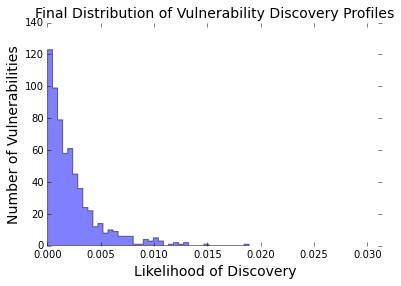

In [9]:
seeker.update()
plt.hist(seeker.circles.area, bins=40, histtype='stepfilled', alpha=.5);
plt.title('Final Distribution of Vulnerability Discovery Profiles', fontsize=14)
plt.xlabel('Likelihood of Discovery', fontsize=14)
plt.ylabel('Number of Vulnerabilities', fontsize=14)
plt.box('off')
plt.xlim(0, .0314)